In [ ]:
import numpy as np
import pandas as pd
from google.colab import files

In [ ]:
file_path = '/content/crop_yield.csv'

In [ ]:
df = pd.read_csv(file_path)

In [ ]:
df.head()

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
0,West,Sandy,Cotton,897.077239,27.676966,False,True,Cloudy,122,6.555816
1,South,Clay,Rice,992.673282,18.026142,True,True,Rainy,140,8.527341
2,North,Loam,Barley,147.998025,29.794042,False,False,Sunny,106,1.127443
3,North,Sandy,Soybean,986.866331,16.644190,False,True,Rainy,146,6.517573
4,South,Silt,Wheat,730.379174,31.620687,True,True,Cloudy,110,7.248251


## **Univariate analysis**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import squarify  # for tree maps
import numpy as np
import plotly.express as px
from matplotlib.ticker import PercentFormatter

In [ ]:
# Bar chart (for categorical variables)
def bar_chart(column, title):
    sns.countplot(data=df, x=column, order=df[column].value_counts().index)
    plt.title(f'Bar Chart of {title}')
    plt.xticks(rotation=45, ha='right')
    plt.show()

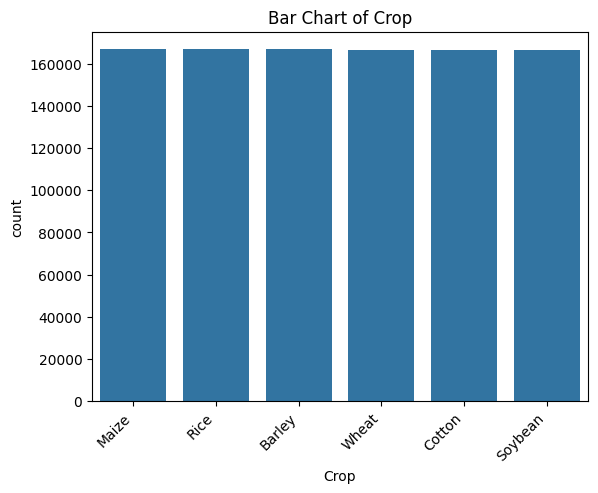

In [ ]:
bar_chart('Crop', 'Crop')

In [ ]:
# Bar chart with percentages
def bar_chart_percent(column, title):
    value_counts = df[column].value_counts(normalize=True) * 100
    sns.barplot(x=value_counts.index, y=value_counts.values)
    plt.gca().yaxis.set_major_formatter(PercentFormatter())
    plt.title(f'Bar Chart with Percentages: {title}')
    plt.xticks(rotation=45, ha='right')
    plt.show()

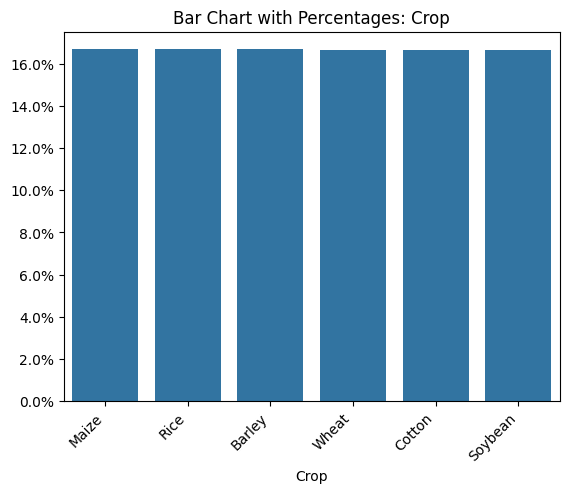

In [ ]:
bar_chart_percent('Crop', 'Crop')

In [ ]:
# Horizontal bar chart
def horizontal_bar_chart(column, title):
    value_counts = df[column].value_counts()
    sns.barplot(y=value_counts.index, x=value_counts.values)
    plt.title(f'Horizontal Bar Chart: {title}')
    plt.show()

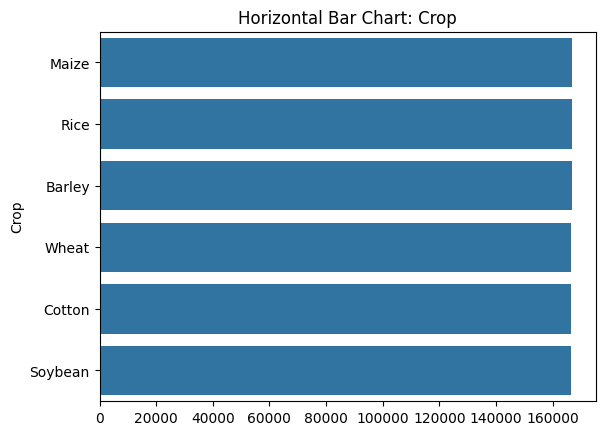

In [ ]:
horizontal_bar_chart('Crop', 'Crop')

In [ ]:
# Pie chart
def pie_chart(column, title):
    value_counts = df[column].value_counts()
    plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90)
    plt.title(f'Pie Chart: {title}')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

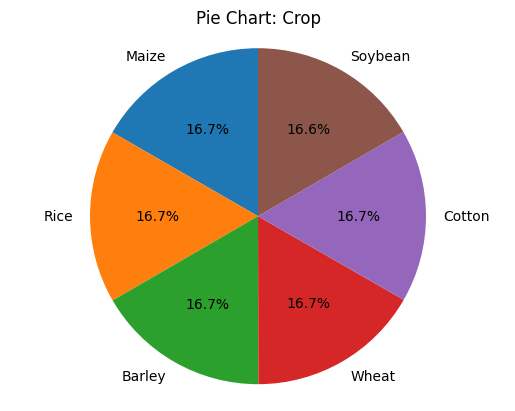

In [ ]:
pie_chart('Crop', 'Crop')

In [ ]:
# Tree map
def tree_map(column, title):
    value_counts = df[column].value_counts()
    squarify.plot(sizes=value_counts.values, label=value_counts.index, alpha=.8)
    plt.axis('off')
    plt.title(f'Tree Map: {title}')
    plt.show()

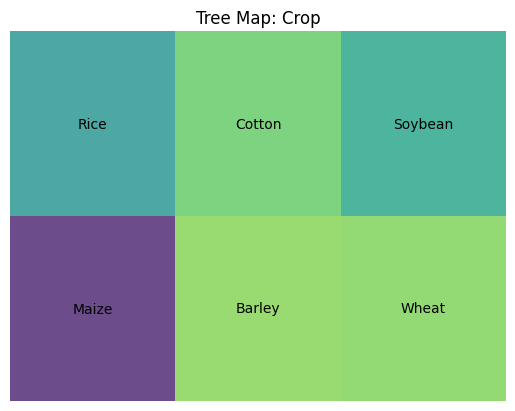

In [ ]:
tree_map('Crop', 'Crop')

In [ ]:
# Histogram for quantitative variables
def histogram(column, title):
    sns.histplot(df[column], kde=False, bins=30)
    plt.title(f'Histogram: {title}')
    plt.show()

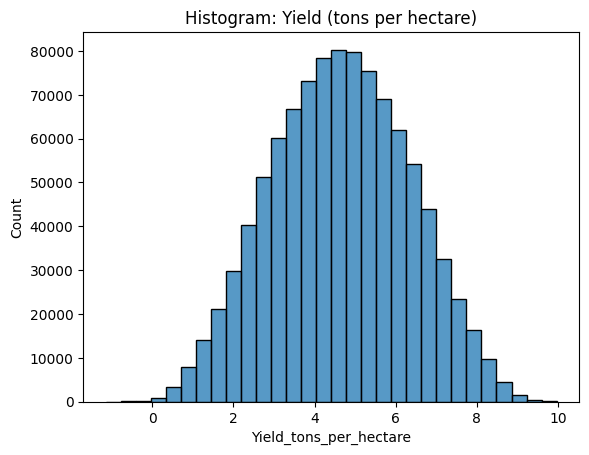

In [ ]:
histogram('Yield_tons_per_hectare', 'Yield (tons per hectare)')

In [ ]:
# Kernel Density Plot with smoothing parameter
def kde_plot(column, title, bandwidth=0.5):
    sns.kdeplot(df[column], bw_adjust=bandwidth)
    plt.title(f'Kernel Density Plot with bw={bandwidth}: {title}')
    plt.show()

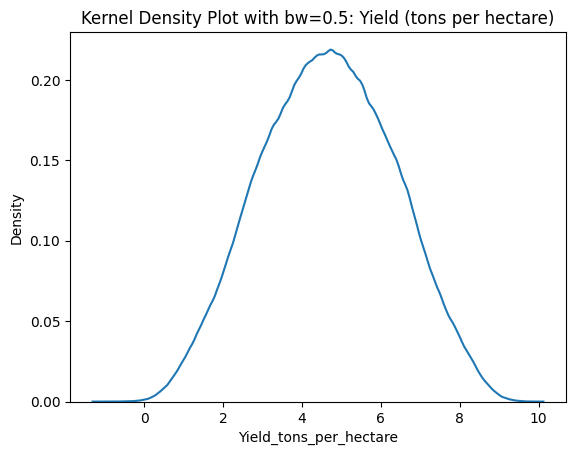

In [ ]:
kde_plot('Yield_tons_per_hectare', 'Yield (tons per hectare)', bandwidth=0.5)

In [ ]:
# Dot plot for quantitative variable
def dot_chart(column, title):
    sns.stripplot(x=df[column])
    plt.title(f'Dot Chart: {title}')
    plt.show()

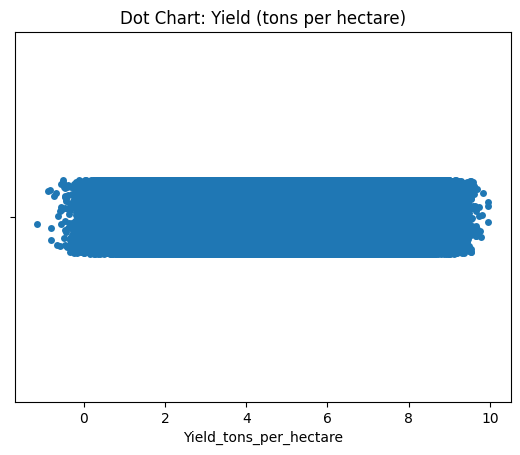

In [ ]:
dot_chart('Yield_tons_per_hectare', 'Yield (tons per hectare)')

## **Multivariate analysis**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from factor_analyzer import FactorAnalyzer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [ ]:
# Load the data
data = pd.read_csv(file_path)


In [ ]:
# 1. Principal Component Analysis (PCA)
def perform_pca(data):
    # Select numerical columns
    num_cols = data.select_dtypes(include=[np.number]).columns
    X = data[num_cols]

    # Standardize the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Perform PCA
    pca = PCA()
    pca_result = pca.fit_transform(X_scaled)

    # Plot explained variance ratio
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), 'bo-')
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance Ratio')
    plt.title('PCA: Cumulative Explained Variance Ratio')
    plt.show()

    # Plot first two principal components
    plt.figure(figsize=(10, 6))
    plt.scatter(pca_result[:, 0], pca_result[:, 1])
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.title('PCA: First Two Principal Components')
    plt.show()

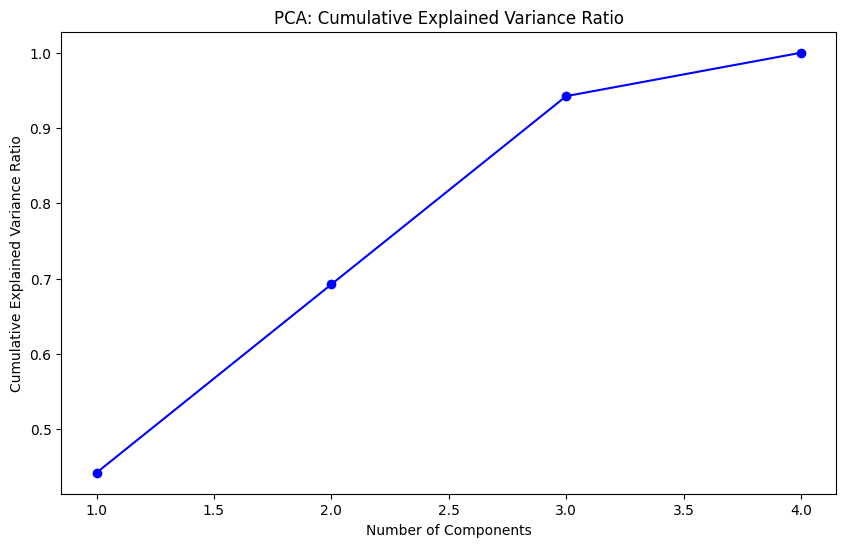

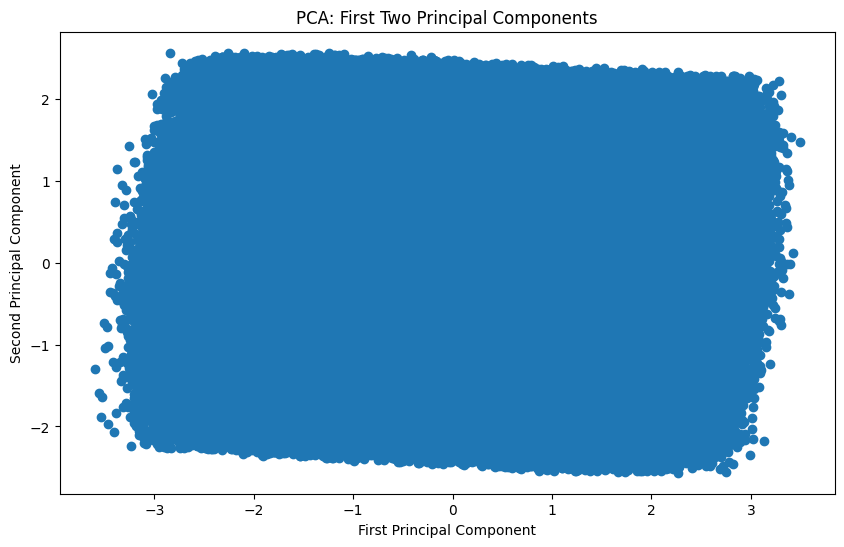

In [ ]:
perform_pca(data)

In [ ]:
# 2. Factor Analysis
def perform_factor_analysis(data):
    # Select numerical columns
    num_cols = data.select_dtypes(include=[np.number]).columns
    X = data[num_cols]

    # Perform Factor Analysis
    # Change n_factors to match the number of numerical columns
    n_factors = len(num_cols)  # or a smaller number if desired
    fa = FactorAnalyzer(rotation=None, n_factors=n_factors)
    fa.fit(X)

    # Plot factor loadings
    # Adjust the column names to match the number of factors
    loadings = pd.DataFrame(fa.loadings_, columns=[f'Factor{i+1}' for i in range(n_factors)], index=num_cols)
    plt.figure(figsize=(12, 8))
    sns.heatmap(loadings, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
    plt.title('Factor Analysis: Factor Loadings')
    plt.show()

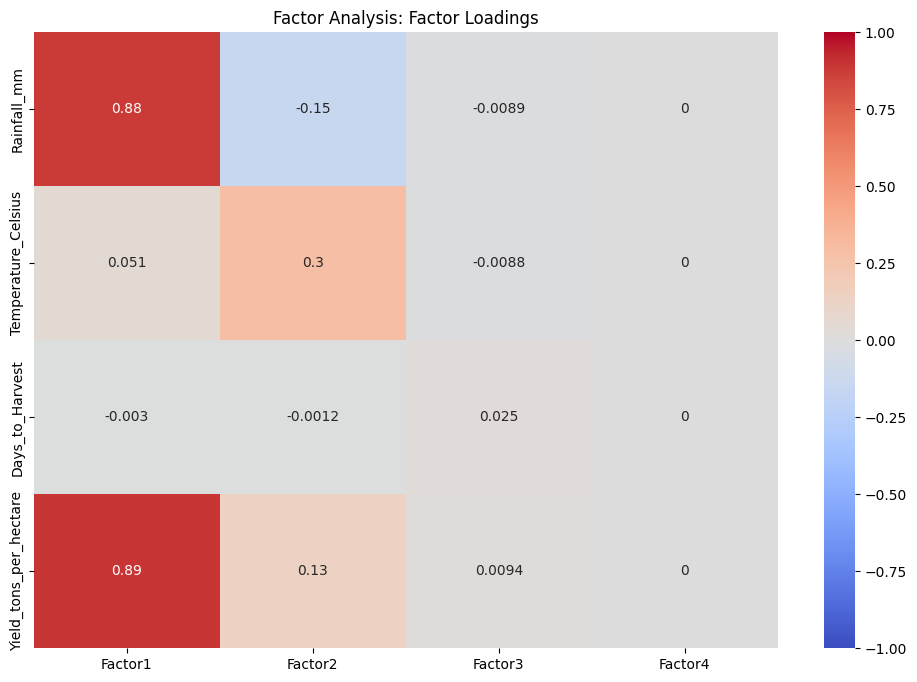

In [ ]:
perform_factor_analysis(data)

In [ ]:
# 3. Linear Discriminant Analysis (LDA)
def perform_lda(data):
    # Select features and target
    X = data[['Rainfall_mm', 'Temperature_Celsius', 'Fertilizer_Used', 'Days_to_Harvest']]
    y = data['Crop']

    # Perform LDA
    lda = LinearDiscriminantAnalysis(n_components=2)
    X_lda = lda.fit_transform(X, y)

    # Plot LDA results
    plt.figure(figsize=(10, 6))
    for crop in y.unique():
        plt.scatter(X_lda[y == crop, 0], X_lda[y == crop, 1], label=crop)
    plt.xlabel('First Discriminant')
    plt.ylabel('Second Discriminant')
    plt.title('LDA: Crop Classification')
    plt.legend()
    plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


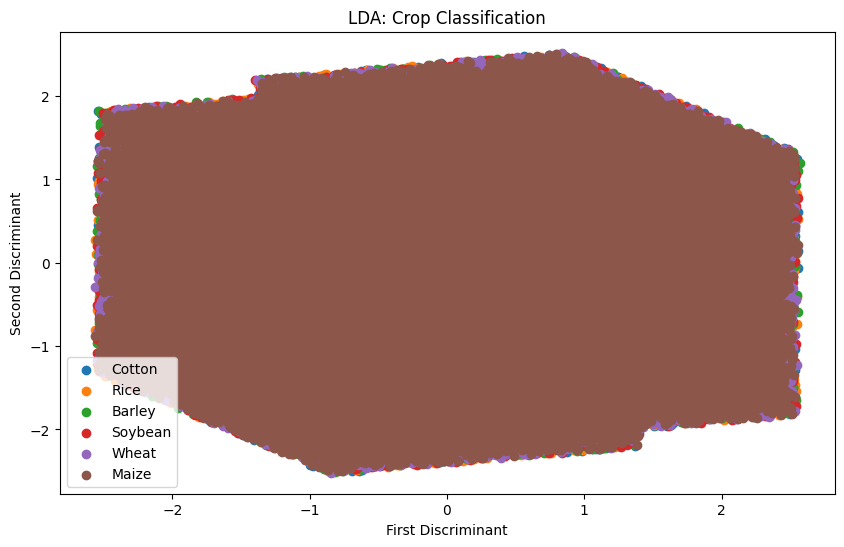

In [ ]:
perform_lda(data)


In [ ]:
# 4. Cluster Analysis (K-Means)
def perform_kmeans(data):
    # Select features for clustering
    X = data[['Rainfall_mm', 'Temperature_Celsius', 'Fertilizer_Used', 'Days_to_Harvest']]

    # Perform K-Means clustering
    kmeans = KMeans(n_clusters=3, random_state=42)
    clusters = kmeans.fit_predict(X)

    # Plot clusters
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(X['Rainfall_mm'], X['Temperature_Celsius'], c=clusters, cmap='viridis')
    plt.xlabel('Rainfall (mm)')
    plt.ylabel('Temperature (Celsius)')
    plt.title('K-Means Clustering: Rainfall vs Temperature')
    plt.colorbar(scatter)
    plt.show()

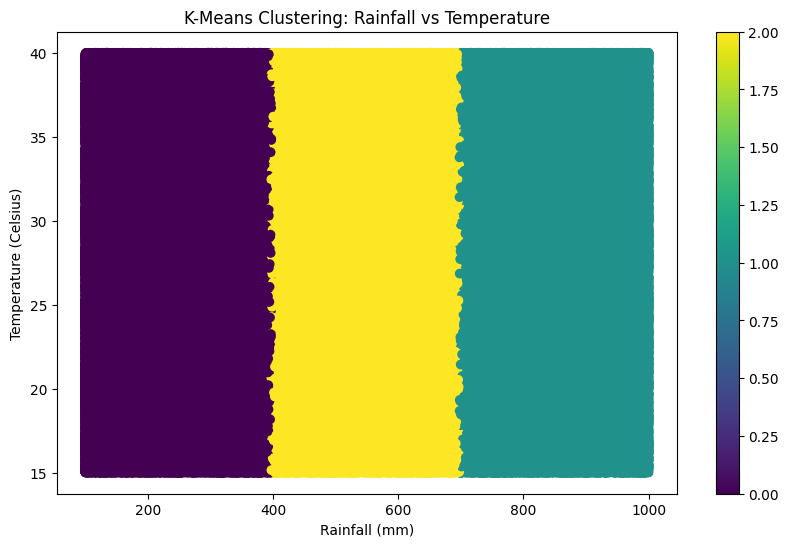

In [ ]:
perform_kmeans(data)

In [ ]:
# 5. Multivariate Regression Analysis
def perform_regression(data):
    # Select features and target
    X = data[['Rainfall_mm', 'Temperature_Celsius', 'Fertilizer_Used', 'Days_to_Harvest']]
    y = data['Yield_tons_per_hectare']

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Perform regression
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate R-squared
    r2 = r2_score(y_test, y_pred)

    # Plot actual vs predicted
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Actual Yield')
    plt.ylabel('Predicted Yield')
    plt.title(f'Multivariate Regression: Actual vs Predicted Yield\nR-squared: {r2:.2f}')
    plt.show()

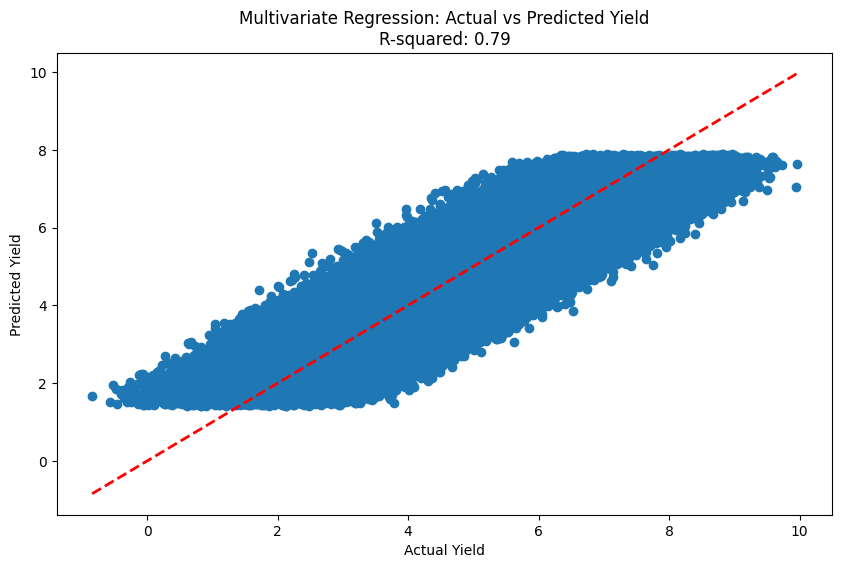

In [ ]:
perform_regression(data)